## Part1

In [1]:
import numpy as np
import pandas as pd
import math

classA = np.array([["A",0,1,0],["A",0,1,1],["A",1,2,1],["A",1,2,0]])
classB = np.array([["B",1,2,2],["B",2,2,2],["B",1,2,-1],["B",2,2,3]])
classC = np.array([["C",-1,-1,-1],["C",0,-1,-2],["C",0,-1,1],["C",-1,-2,1]])

In [2]:
data_df = pd.DataFrame(np.vstack([classA,classB,classC]),columns=["class",'x','y','z'])
data_df

,class,x,y,z
0,A,0,1,0
1,A,0,1,1
2,A,1,2,1
3,A,1,2,0
4,B,1,2,2
5,B,2,2,2
6,B,1,2,-1
7,B,2,2,3
8,C,-1,-1,-1
9,C,0,-1,-2


In [3]:
def distance (feature,sample): ## can be used to cahnge the distance formula used (Using L2 norm or  Euclidean distance)
    return np.linalg.norm(feature-sample,ord=2)

########## K-Nearest Neighbour ####################
def K_NN(X, k , df : pd.DataFrame):
    
    distances = np.zeros((len(df),1))
    features = df[["x","y","z"]].to_numpy()
    
    for i in range(len(df)):
        feature = [int(str) for str in features[i]]
        distances[i] = distance(feature,X)
        print("Distance between {0} and {1} is {2}".format(feature,X,distance(feature,X)))
    
    K_nearest_label = data_df["class"].iloc[np.argsort(distances,axis=0)[0:k].squeeze(axis=1)]

    print("\nThe {0} closest neighbour(s) have the label : {1} ".format(k,K_nearest_label.to_numpy()))
    
    most_frequnet_label = K_nearest_label.mode().to_numpy()[0] 

    if(len(most_frequnet_label) != 1): # resolve ties
        most_frequnet_label = most_frequnet_label[math.floor(np.random.randint(low=0,high=len(most_frequnet_label)))]
    
    print("The sample {0} is of class : {1}".format(X,most_frequnet_label) )

In [4]:
sample = np.array([1,0,1])
K_NN(sample,k=1,df=data_df)

Distance between [0, 1, 0] and [1 0 1] is 1.7320508075688772
Distance between [0, 1, 1] and [1 0 1] is 1.4142135623730951
Distance between [1, 2, 1] and [1 0 1] is 2.0
Distance between [1, 2, 0] and [1 0 1] is 2.23606797749979
Distance between [1, 2, 2] and [1 0 1] is 2.23606797749979
Distance between [2, 2, 2] and [1 0 1] is 2.449489742783178
Distance between [1, 2, -1] and [1 0 1] is 2.8284271247461903
Distance between [2, 2, 3] and [1 0 1] is 3.0
Distance between [-1, -1, -1] and [1 0 1] is 3.0
Distance between [0, -1, -2] and [1 0 1] is 3.3166247903554
Distance between [0, -1, 1] and [1 0 1] is 1.4142135623730951
Distance between [-1, -2, 1] and [1 0 1] is 2.8284271247461903

The 1 closest neighbour(s) have the label : ['A'] 
The sample [1 0 1] is of class : A


In [5]:
K_NN(sample,k=2,df=data_df)

Distance between [0, 1, 0] and [1 0 1] is 1.7320508075688772
Distance between [0, 1, 1] and [1 0 1] is 1.4142135623730951
Distance between [1, 2, 1] and [1 0 1] is 2.0
Distance between [1, 2, 0] and [1 0 1] is 2.23606797749979
Distance between [1, 2, 2] and [1 0 1] is 2.23606797749979
Distance between [2, 2, 2] and [1 0 1] is 2.449489742783178
Distance between [1, 2, -1] and [1 0 1] is 2.8284271247461903
Distance between [2, 2, 3] and [1 0 1] is 3.0
Distance between [-1, -1, -1] and [1 0 1] is 3.0
Distance between [0, -1, -2] and [1 0 1] is 3.3166247903554
Distance between [0, -1, 1] and [1 0 1] is 1.4142135623730951
Distance between [-1, -2, 1] and [1 0 1] is 2.8284271247461903

The 2 closest neighbour(s) have the label : ['A' 'C'] 
The sample [1 0 1] is of class : A


In [6]:
K_NN(sample,k=3,df=data_df)

Distance between [0, 1, 0] and [1 0 1] is 1.7320508075688772
Distance between [0, 1, 1] and [1 0 1] is 1.4142135623730951
Distance between [1, 2, 1] and [1 0 1] is 2.0
Distance between [1, 2, 0] and [1 0 1] is 2.23606797749979
Distance between [1, 2, 2] and [1 0 1] is 2.23606797749979
Distance between [2, 2, 2] and [1 0 1] is 2.449489742783178
Distance between [1, 2, -1] and [1 0 1] is 2.8284271247461903
Distance between [2, 2, 3] and [1 0 1] is 3.0
Distance between [-1, -1, -1] and [1 0 1] is 3.0
Distance between [0, -1, -2] and [1 0 1] is 3.3166247903554
Distance between [0, -1, 1] and [1 0 1] is 1.4142135623730951
Distance between [-1, -2, 1] and [1 0 1] is 2.8284271247461903

The 3 closest neighbour(s) have the label : ['A' 'C' 'A'] 
The sample [1 0 1] is of class : A


## Part 2

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# load mini training data and labels
mini_train = np.load('knn_minitrain.npy')
mini_train_label = np.load('knn_minitrain_label.npy')

# randomly generate test data
mini_test = np.random.randint(20, size=20)
mini_test = mini_test.reshape(10,2)

In [9]:
# Define knn classifier
def kNNClassify(newInput, dataSet, labels, k):
    result=[]

    for i in range(len(newInput)):
        distance = np.zeros(len(dataSet))

        for j in range(len(dataSet)):
            distance[j] = np.linalg.norm(dataSet[j]-newInput[i],ord=2)

        nearestLabels = labels[np.argsort(distance)[:k]]
        result.append(np.bincount(nearestLabels).argmax())

    return result

outputlabels=kNNClassify(mini_test,mini_train,mini_train_label,4)

print ('random test points are:\n', mini_test)
print ('knn classfied labels for test:', outputlabels)

random test points are:
 [[19 17]
 [ 1  9]
 [ 4  5]
 [ 7  5]
 [16  3]
 [11 11]
 [15  7]
 [12  3]
 [ 1 11]
 [13 12]]
knn classfied labels for test: [1, 2, 2, 2, 3, 1, 3, 3, 0, 1]


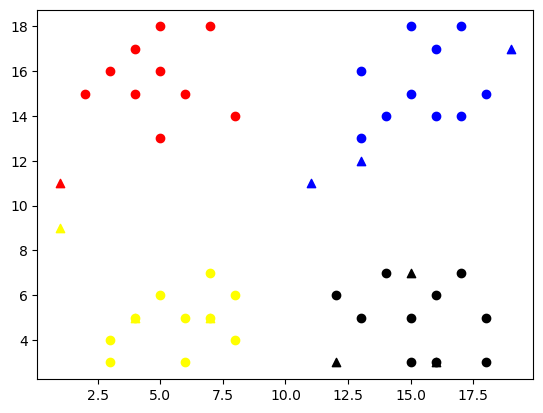

<Figure size 640x480 with 0 Axes>

In [10]:
# plot train data and classfied test data
train_x = mini_train[:,0]
train_y = mini_train[:,1]
fig = plt.figure()
plt.scatter(train_x[np.where(mini_train_label==0)], train_y[np.where(mini_train_label==0)], color='red')
plt.scatter(train_x[np.where(mini_train_label==1)], train_y[np.where(mini_train_label==1)], color='blue')
plt.scatter(train_x[np.where(mini_train_label==2)], train_y[np.where(mini_train_label==2)], color='yellow')
plt.scatter(train_x[np.where(mini_train_label==3)], train_y[np.where(mini_train_label==3)], color='black')

test_x = mini_test[:,0]
test_y = mini_test[:,1]
outputlabels = np.array(outputlabels)
plt.scatter(test_x[np.where(outputlabels==0)], test_y[np.where(outputlabels==0)], marker='^', color='red')
plt.scatter(test_x[np.where(outputlabels==1)], test_y[np.where(outputlabels==1)], marker='^', color='blue')
plt.scatter(test_x[np.where(outputlabels==2)], test_y[np.where(outputlabels==2)], marker='^', color='yellow')
plt.scatter(test_x[np.where(outputlabels==3)], test_y[np.where(outputlabels==3)], marker='^', color='black')

plt.show()
#save diagram as png file
plt.savefig("miniknn.png")

## Download MNIST

In [11]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()


Download complete.
Save complete.


# Part 3

In [12]:
import math
import numpy as np  
from download_mnist import load
import operator  
import time

In [13]:
# classify using kNN  
#x_train = np.load('../x_train.npy')
#y_train = np.load('../y_train.npy')
#x_test = np.load('../x_test.npy')
#y_test = np.load('../y_test.npy')
x_train, y_train, x_test, y_test = load()
x_train = x_train.reshape(60000,28,28)
x_test  = x_test.reshape(10000,28,28)
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [14]:
def kNNClassify(newInput, dataSet, labels, k): 
    result=[]
    
    for i in range(len(newInput)):
        distance = np.zeros(len(dataSet))

        for j in range(len(dataSet)):
            distance[j] = np.linalg.norm(dataSet[j]-newInput[i],ord=2)

        nearestLabels = labels[np.argsort(distance)[:k]]
        result.append(np.bincount(nearestLabels).argmax())

    return result

In [15]:
start_time = time.time()
outputlabels=kNNClassify(x_test[0:20],x_train,y_train,10)
result = y_test[0:20] - outputlabels
result = (1 - np.count_nonzero(result)/len(outputlabels))
print ("---classification accuracy for knn on mnist: %s ---" %result)
print ("---execution time: %s seconds ---" % (time.time() - start_time))

---classification accuracy for knn on mnist: 1.0 ---
---execution time: 43.49262189865112 seconds ---
